# Loading the first dataset

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from cvxopt import matrix, solvers
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [49]:
import pandas as pd


universalbank_data=pd.read_csv('archive/UniversalBank.csv') 
universalbank_data.head(10)



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [50]:
universalbank_data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [51]:
print('Number of missing values in each column:')
universalbank_data.isnull().sum()

Number of missing values in each column:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [52]:
print('Number of duplicated rows:')
universalbank_data.duplicated().sum()

Number of duplicated rows:


0

In [53]:
print('Values for Personal Loan:')
universalbank_data['Personal Loan'].value_counts()

Values for Personal Loan:


Personal Loan
0    4520
1     480
Name: count, dtype: int64

# Filter data

In [54]:
universalbank_data = universalbank_data.drop(columns=['ID', 'ZIP Code'])

In [55]:
universalbank_data.drop_duplicates(inplace=True)

# Some insights

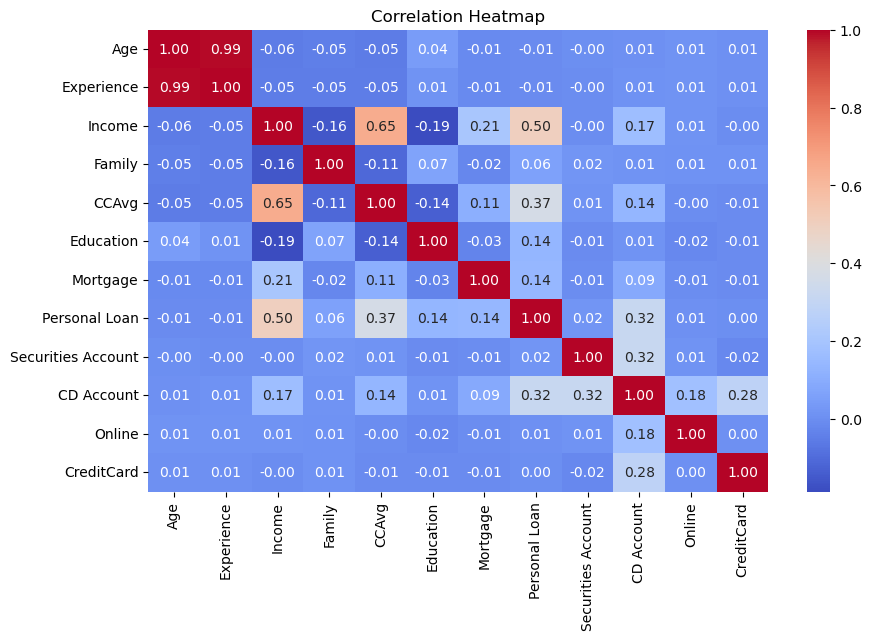

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(universalbank_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# As we can see, there are correlations between the following columns:
    * Income and CCAverage(Strong), Mortgage(Moderate), Personal Loan(Moderate) and CD Account(Weak)
    * Mortgage and CC
    * CCAvg and Income(Strong), Personal Loan(Moderate)
    * Securities Account and CD Account(Moderate)
    * CD Account and Income(Weak), CCAvg(Weak), Personal Loan(Moderate), Securities Account(Moderate)
    * Credit Card and CD Account (Weak)


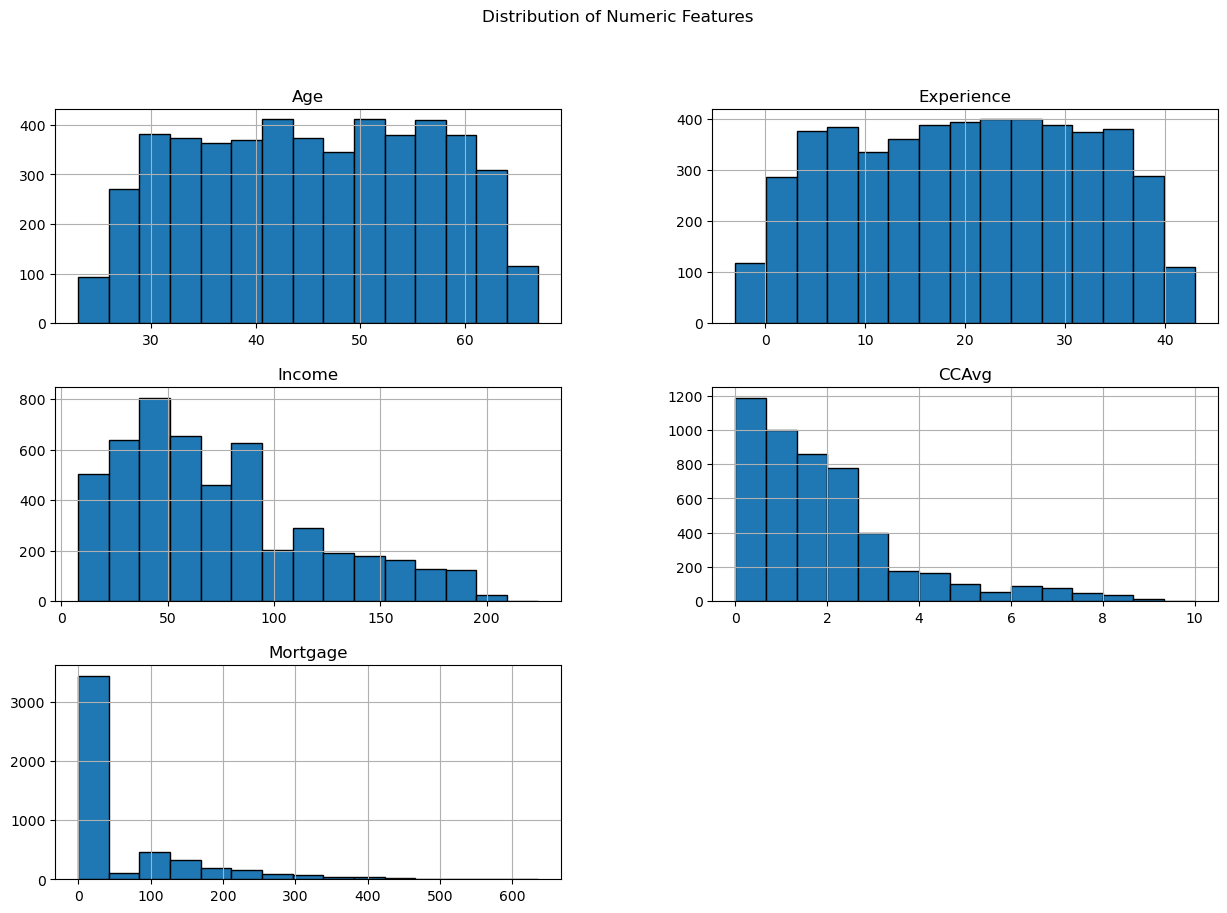

In [57]:
numeric_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
universalbank_data[numeric_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

In [58]:
features=['Income','CCAvg']
X=universalbank_data[features]
y=universalbank_data['Personal Loan']
y = np.where(y == 0, -1, 1)

print(f"Class Distribution: {np.bincount(y + 1)}")  # Convert -1,1 back to 0,1 for display



Class Distribution: [4507    0  480]


Imbalanced dataset - > 4507 rejected vs 48 approved . One class represents about 90% of the data, while the other is only about 10%

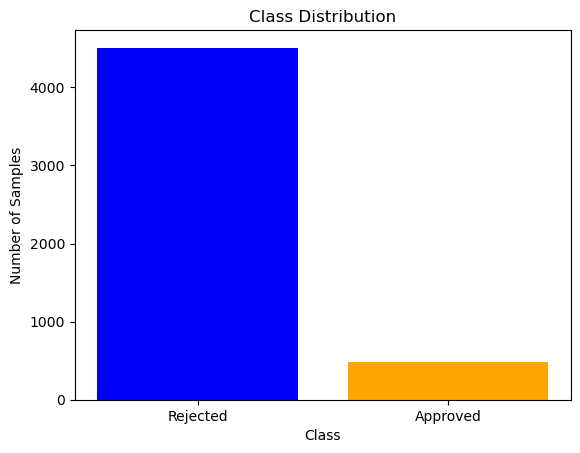

In [59]:
labels = ['Rejected', 'Approved']
counts = [4507, 480]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

### For now we will work with the imbalanced dataset, then try to find some solutions to balance it 

# Train & Test

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


features=['Income','CCAvg']
X=universalbank_data[features]
y=universalbank_data['Personal Loan']
y = np.where(y == 0, -1, 1)

print(f"Class Distribution: {np.bincount(y + 1)}")  # Convert -1,1 back to 0,1 for display




## Extracted from the lab svm.ipynb


### 1ST Try : Hard Margin SVM


In [61]:
def compute_kernel_matrix(x, y, kwargs):

    kernel_type = kwargs['kernel_type']

    result = None

    ######## YOUR CODE HERE ########

    #print(x.shape)
    #print(y.shape)

    if kernel_type == 'linear':
        #print(x.shape)
        #print(y.shape)
        result = x @ y.T # dot product between x and x's transpose - to create the kernel matrix

    if kernel_type == 'polynomial':
        c = kwargs['c']
        degree = kwargs['degree']
        result = (x @ y.T + c) ** degree

    if kernel_type == 'gaussian':
        gamma = kwargs['gamma']
        sq_dists = np.sum(x**2, axis=1).reshape(-1, 1) + np.sum(y**2, axis=1) - 2 * np.dot(x, y.T)
        result = np.exp(-gamma * sq_dists)
    ################################

    return result

In [62]:
def find_alpha(X, y, K):

    n_samples, n_features = X.shape
    P_numpy, q_numpy, G_numpy, h_numpy, A_numpy, b_numpy = None, None, None, None, None, None

    # Convert inputs to cvxopt format
    ######### YOUR CODE HERE #########

    #print(K.shape)
    #print(P_numpy.shape())
    #print(y.shape)

    y = y.reshape(-1,1) #shape it as a vector of (n_samples,1)

    yyt = y @ y.T #compute yi*yj

    P_numpy = yyt * K #matrix multiplication between each line and each column for y, them multiplied by matrix K
    q_numpy = -np.ones(n_samples)
    G_numpy = -np.eye(n_samples)
    h_numpy = np.zeros(n_samples) #not convinced about this
    A_numpy = y.reshape(1,-1)
    b_numpy = np.zeros(1)
    ##################################

    # Convert inputs to cvxopt format
    P = matrix(P_numpy, tc='d')
    q = matrix(q_numpy, tc='d')
    G = matrix(G_numpy, tc='d')
    h = matrix(h_numpy, tc='d')
    A = matrix(A_numpy, tc='d')
    b = matrix(b_numpy, tc='d')

    # Solve the QP problem to find Lagrange multipliers alpha
    solution = solvers.qp(P, q, G, h, A, b)
    alpha = np.ravel(solution['x'])

    return alpha

In [63]:
class HardMarginSVM:
    def __init__(self, kwargs=None):
        self.kwargs = kwargs
        self.support_vectors = None
        self.w = None
        self.b = None

    def kernel_function(self, x, y):
        return compute_kernel_matrix(x, y, self.kwargs)

    def fit(self, X, y):

        #print(X.shape)
        K = self.kernel_function(X, X)
        n_samples, n_features = X.shape

        # Solve the dual optimization problem to obtain the Lagrange multipliers
        self.alpha = find_alpha(X, y, K)

        # Select support vectors
        support_vector_indices = self.alpha > 1e-8
        self.alpha = self.alpha[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]

        # Compute the bias term b
        self.b = None
        ######### YOUR CODE HERE #########

        decision_function_at_support = np.sum(
            self.alpha * self.support_vector_labels *
            self.kernel_function(self.support_vectors, self.support_vectors), axis=1
        )
        self.b = np.mean(self.support_vector_labels - decision_function_at_support)

        ##################################

    def predict(self, X):

        pred = None

        ######### YOUR CODE HERE #########

        K_matr = self.kernel_function(X, self.support_vectors)

        decision_function = K_matr @ (self.alpha * self.support_vector_labels) + self.b

        pred = np.sign(decision_function)

        ##################################

        return pred

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', s=30, edgecolors='k', label='Data Points')
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, linewidth=1, facecolors='none',
                    edgecolors='k', label='Support Vectors')

        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]  # Create grid for decision boundary

        # Corrected kernel function to handle the grid and support vectors
        K_matr = self.kernel_function(grid, self.support_vectors)  # kernel between grid and support vectors

        # Compute decision function for each point in the grid
        decision_function = np.sum(K_matr * self.alpha * self.support_vector_labels, axis=1) + self.b
        Z = np.sign(decision_function).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.legend()
        plt.show()




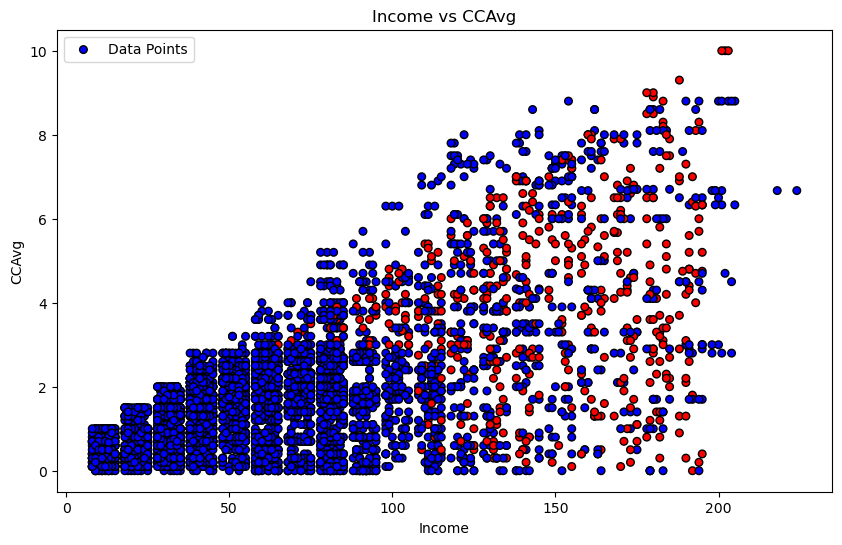

In [64]:
#plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X['Income'], X['CCAvg'], c=y, cmap='bwr', marker='o', s=30, edgecolors='k', label='Data Points')
plt.title('Income vs CCAvg')
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()


## Gaussian

     pcost       dcost       gap    pres   dres
 0: -8.6130e+02 -2.5804e+03  2e+04  8e+01  3e+00
 1: -2.7184e+03 -5.5388e+03  1e+04  5e+01  2e+00
 2: -5.9240e+03 -9.9698e+03  1e+04  4e+01  2e+00
 3: -1.6236e+04 -2.0613e+04  1e+04  3e+01  1e+00
 4: -2.0851e+04 -2.6026e+04  1e+04  3e+01  1e+00
 5: -3.2666e+04 -3.9727e+04  1e+04  3e+01  1e+00
 6: -8.5004e+04 -9.8245e+04  2e+04  3e+01  1e+00
 7: -1.7411e+05 -1.9708e+05  3e+04  3e+01  1e+00
 8: -1.7835e+05 -2.0179e+05  3e+04  3e+01  1e+00
 9: -2.6152e+05 -2.9369e+05  4e+04  3e+01  1e+00
10: -8.3149e+05 -9.0867e+05  8e+04  3e+01  1e+00
11: -2.2976e+06 -2.4770e+06  2e+05  3e+01  1e+00
12: -2.8945e+06 -3.1153e+06  2e+05  3e+01  1e+00
13: -7.0440e+06 -7.5235e+06  5e+05  3e+01  1e+00
14: -1.0826e+07 -1.1535e+07  7e+05  3e+01  1e+00
15: -5.1131e+07 -5.3730e+07  3e+06  3e+01  1e+00
16: -6.2836e+07 -6.5987e+07  3e+06  3e+01  1e+00
17: -1.0372e+08 -1.0874e+08  5e+06  3e+01  1e+00
18: -1.0827e+08 -1.1350e+08  5e+06  3e+01  1e+00
19: -2.2234e+08 -2.32

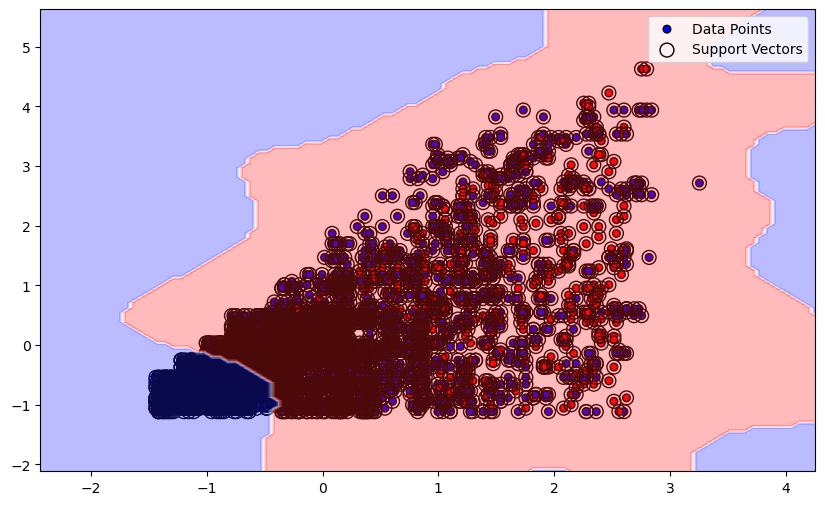

     pcost       dcost       gap    pres   dres
 0: -2.0396e+02 -5.9425e+02  3e+03  3e+01  3e+00
 1: -6.8949e+02 -1.2720e+03  2e+03  2e+01  2e+00
 2: -2.1198e+03 -2.8039e+03  2e+03  1e+01  1e+00
 3: -3.2604e+03 -4.1552e+03  2e+03  1e+01  1e+00
 4: -7.2152e+03 -8.6807e+03  3e+03  1e+01  1e+00
 5: -2.0895e+04 -2.3792e+04  4e+03  1e+01  1e+00
 6: -6.3470e+04 -6.9976e+04  8e+03  1e+01  1e+00
 7: -2.2835e+05 -2.4631e+05  2e+04  1e+01  1e+00
 8: -6.3499e+05 -6.7742e+05  4e+04  1e+01  1e+00
 9: -9.6596e+05 -1.0275e+06  6e+04  1e+01  1e+00
10: -2.0175e+06 -2.1357e+06  1e+05  1e+01  1e+00
11: -3.9352e+06 -4.1514e+06  2e+05  1e+01  1e+00
12: -6.0019e+06 -6.3212e+06  3e+05  1e+01  1e+00
13: -1.5690e+07 -1.6456e+07  8e+05  1e+01  1e+00
14: -4.6162e+07 -4.8195e+07  2e+06  1e+01  1e+00
15: -8.3106e+07 -8.6608e+07  4e+06  1e+01  1e+00
16: -1.0176e+08 -1.0600e+08  4e+06  1e+01  1e+00
17: -2.2579e+08 -2.3473e+08  9e+06  1e+01  1e+00
18: -5.0085e+08 -5.1987e+08  2e+07  1e+01  1e+00
19: -6.1093e+08 -6.33

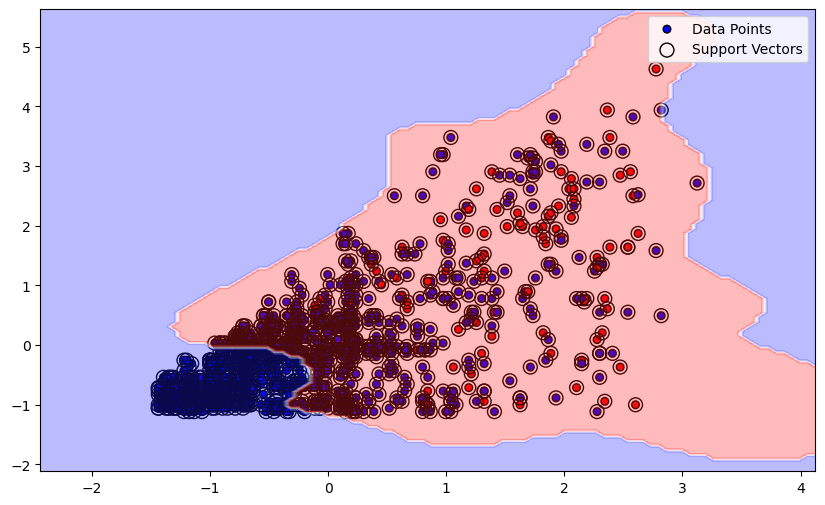

In [65]:
dict_gaussian = {'kernel_type': 'gaussian', 'gamma': 1}
svm_gaussian = HardMarginSVM(dict_gaussian)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

svm_gaussian.fit(X_train_2D, y_train)
print("Gaussian SVM results on training set:")
svm_gaussian.plot_decision_boundary(X_train_2D, y_train)

svm_gaussian.fit(X_test_2D, y_test)
print("Gaussian SVM results on testing set:")
svm_gaussian.plot_decision_boundary(X_test_2D, y_test)

y_train_pred = svm_gaussian.predict(X_train_2D)
y_test_pred = svm_gaussian.predict(X_test_2D)


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, dataset_name=""):
    print(f"Results for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

y_train_pred = svm_gaussian.predict(X_train_2D)
evaluate_model(y_train, y_train_pred, dataset_name="Training Set")

y_test_pred = svm_gaussian.predict(X_test_2D)
evaluate_model(y_test, y_test_pred, dataset_name="Testing Set")




Results for Training Set:
Accuracy: 0.48
Precision: 0.16
Recall: 1.00
F1 Score: 0.27
Confusion Matrix:
[[1544 2059]
 [   0  386]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60      3603
           1       0.16      1.00      0.27       386

    accuracy                           0.48      3989
   macro avg       0.58      0.71      0.44      3989
weighted avg       0.92      0.48      0.57      3989

Results for Testing Set:
Accuracy: 0.49
Precision: 0.16
Recall: 1.00
F1 Score: 0.27
Confusion Matrix:
[[394 510]
 [  0  94]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.44      0.61       904
           1       0.16      1.00      0.27        94

    accuracy                           0.49       998
   macro avg       0.58      0.72      0.44       998
weighted avg       0.92      0.49      0.58       998



##  Gaussian : Optimizations
* ### PCA to reduce data to 2D
* ### Then log transform the data
* ### SMOTE Resampling techniques to solve imbalance

In [67]:
def handle_nan(X):
    if np.isnan(X).any():
        print("NaN values found in data.")
        X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))
    return X

### With PCA

     pcost       dcost       gap    pres   dres
 0: -2.3052e+03 -6.7833e+03  3e+04  1e+02  3e+00
 1: -8.2295e+03 -1.7467e+04  2e+04  7e+01  2e+00
 2: -1.2413e+04 -2.3672e+04  2e+04  6e+01  2e+00
 3: -3.4153e+04 -4.5327e+04  2e+04  4e+01  1e+00
 4: -8.2808e+04 -1.0087e+05  2e+04  4e+01  1e+00
 5: -2.3574e+05 -2.7031e+05  4e+04  4e+01  1e+00
 6: -8.7301e+05 -9.5728e+05  9e+04  4e+01  1e+00
 7: -1.5313e+06 -1.6683e+06  1e+05  4e+01  1e+00
 8: -2.5538e+06 -2.7687e+06  2e+05  4e+01  1e+00
 9: -6.8092e+06 -7.3065e+06  5e+05  4e+01  1e+00
10: -2.8017e+07 -2.9630e+07  2e+06  4e+01  1e+00
11: -7.7804e+07 -8.1823e+07  4e+06  4e+01  1e+00
12: -1.3333e+08 -1.3996e+08  7e+06  4e+01  1e+00
13: -3.0593e+08 -3.2022e+08  1e+07  4e+01  1e+00
14: -3.3159e+08 -3.4702e+08  2e+07  4e+01  1e+00
15: -1.1990e+09 -1.2484e+09  5e+07  4e+01  1e+00
16: -1.4033e+09 -1.4607e+09  6e+07  4e+01  1e+00
17: -1.6514e+09 -1.7184e+09  7e+07  4e+01  1e+00
18: -2.2248e+09 -2.3138e+09  9e+07  4e+01  1e+00
19: -4.2901e+09 -4.45

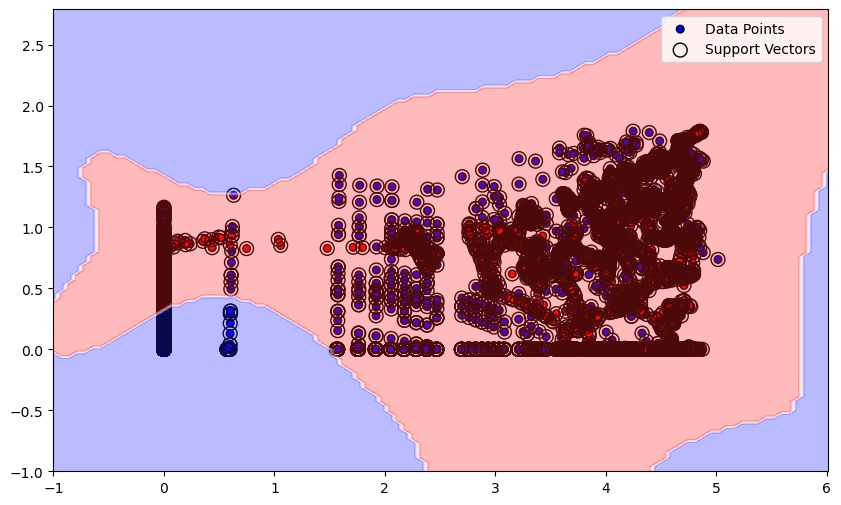

Gaussian SVM results on testing set:


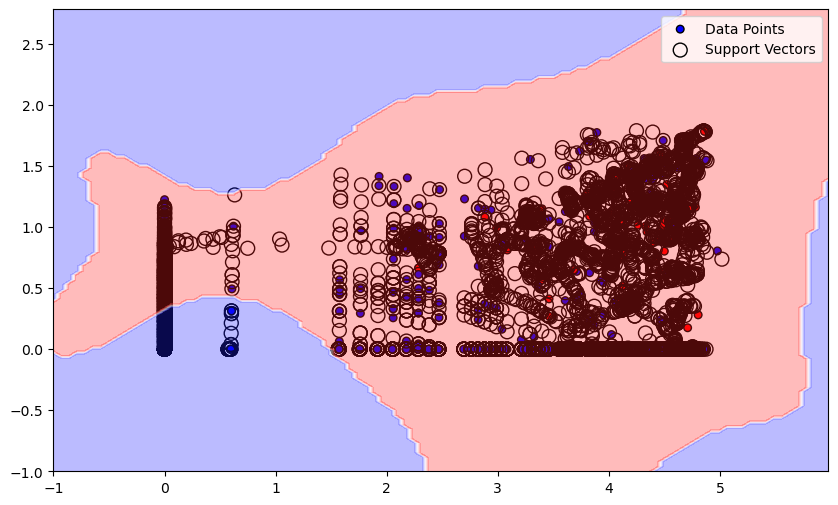

Results for Training Set:
Accuracy: 0.72
Precision: 0.64
Recall: 1.00
F1 Score: 0.78
Confusion Matrix:
[[1550 2053]
 [   0 3603]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60      3603
           1       0.64      1.00      0.78      3603

    accuracy                           0.72      7206
   macro avg       0.82      0.72      0.69      7206
weighted avg       0.82      0.72      0.69      7206

Results for Testing Set:
Accuracy: 0.51
Precision: 0.16
Recall: 1.00
F1 Score: 0.28
Confusion Matrix:
[[416 488]
 [  0  94]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.46      0.63       904
           1       0.16      1.00      0.28        94

    accuracy                           0.51       998
   macro avg       0.58      0.73      0.45       998
weighted avg       0.92      0.51      0.60       998



In [68]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

dict_gaussian = {'kernel_type': 'gaussian', 'gamma': 0.5}
svm_gaussian = HardMarginSVM(dict_gaussian)

pca = PCA(n_components=2)  
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

X_train_2D = handle_nan(X_train_2D)
X_test_2D = handle_nan(X_test_2D)

X_train_scaled_log = np.log1p(np.maximum(X_train_2D, 0))
X_test_scaled_log = np.log1p(np.maximum(X_test_2D, 0))

X_train_scaled_log = handle_nan(X_train_scaled_log)
X_test_scaled_log = handle_nan(X_test_scaled_log)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_log, y_train)


svm_gaussian.fit(X_train_resampled, y_train_resampled)
print("Gaussian SVM results on training set:")
svm_gaussian.plot_decision_boundary(X_train_resampled, y_train_resampled)


print("Gaussian SVM results on testing set:")
svm_gaussian.plot_decision_boundary(X_test_scaled_log, y_test)

y_train_pred = svm_gaussian.predict(X_train_resampled)
evaluate_model(y_train_resampled, y_train_pred, dataset_name="Training Set")

y_test_pred = svm_gaussian.predict(X_test_scaled_log)
evaluate_model(y_test, y_test_pred, dataset_name="Testing Set")

### Without PCA

     pcost       dcost       gap    pres   dres
 0: -2.4647e+03 -7.3438e+03  2e+04  9e+01  3e+00
 1: -1.1188e+04 -1.8380e+04  1e+04  5e+01  2e+00
 2: -1.8246e+04 -2.7825e+04  2e+04  5e+01  1e+00
 3: -5.4390e+04 -6.7011e+04  2e+04  4e+01  1e+00
 4: -1.2903e+05 -1.5166e+05  2e+04  4e+01  1e+00
 5: -3.6687e+05 -4.1356e+05  5e+04  3e+01  1e+00
 6: -5.2093e+05 -5.8288e+05  6e+04  3e+01  1e+00
 7: -2.1214e+06 -2.2901e+06  2e+05  3e+01  1e+00
 8: -3.1761e+06 -3.4167e+06  2e+05  3e+01  1e+00
 9: -1.3458e+07 -1.4242e+07  8e+05  3e+01  1e+00
10: -1.6253e+07 -1.7186e+07  9e+05  3e+01  1e+00
11: -5.6548e+07 -5.9357e+07  3e+06  3e+01  1e+00
12: -4.0595e+08 -4.2034e+08  1e+07  3e+01  1e+00
13: -2.0118e+09 -2.0728e+09  6e+07  3e+01  1e+00
14: -4.7845e+09 -4.9235e+09  1e+08  3e+01  1e+00
15: -1.5131e+10 -1.5544e+10  4e+08  3e+01  1e+00
16: -7.4176e+10 -7.5989e+10  2e+09  3e+01  1e+00
17: -2.9187e+11 -2.9849e+11  7e+09  3e+01  1e+00
18: -3.5825e+11 -3.6633e+11  8e+09  3e+01  1e+00
19: -3.8130e+11 -3.89

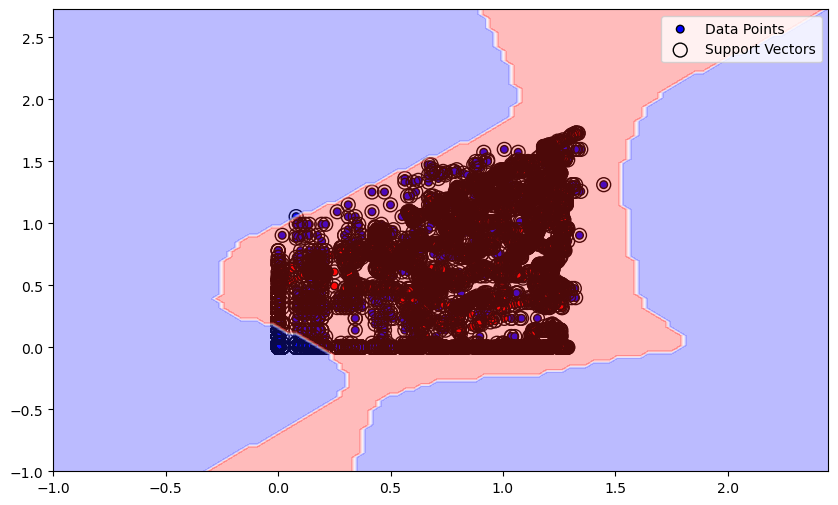

Gaussian SVM results on testing set:


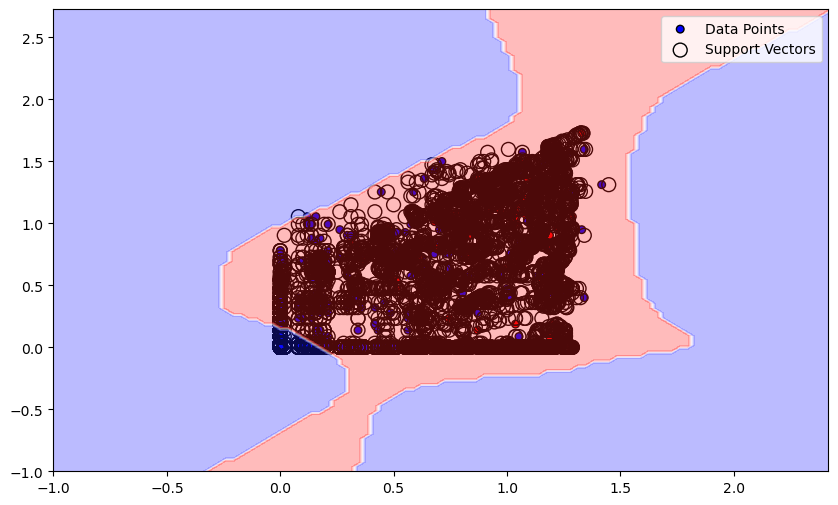

Results for Training Set:
Accuracy: 0.80
Precision: 0.72
Recall: 1.00
F1 Score: 0.84
Confusion Matrix:
[[2189 1414]
 [   0 3603]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.61      0.76      3603
           1       0.72      1.00      0.84      3603

    accuracy                           0.80      7206
   macro avg       0.86      0.80      0.80      7206
weighted avg       0.86      0.80      0.80      7206

Results for Testing Set:
Accuracy: 0.67
Precision: 0.22
Recall: 1.00
F1 Score: 0.37
Confusion Matrix:
[[578 326]
 [  0  94]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.64      0.78       904
           1       0.22      1.00      0.37        94

    accuracy                           0.67       998
   macro avg       0.61      0.82      0.57       998
weighted avg       0.93      0.67      0.74       998



In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_log = np.log1p(np.maximum(X_train_scaled, 0))
X_test_scaled_log = np.log1p(np.maximum(X_test_scaled, 0))

X_train_scaled_log = handle_nan(X_train_scaled_log)
X_test_scaled_log = handle_nan(X_test_scaled_log)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_log, y_train)

svm_gaussian.fit(X_train_resampled, y_train_resampled)

print("Gaussian SVM results on training set:")
svm_gaussian.plot_decision_boundary(X_train_resampled, y_train_resampled)

print("Gaussian SVM results on testing set:")
svm_gaussian.plot_decision_boundary(X_test_scaled_log, y_test)

y_train_pred = svm_gaussian.predict(X_train_resampled)
evaluate_model(y_train_resampled, y_train_pred, dataset_name="Training Set")

y_test_pred = svm_gaussian.predict(X_test_scaled_log)
evaluate_model(y_test, y_test_pred, dataset_name="Testing Set")

## Polynomial

## Degree 2

     pcost       dcost       gap    pres   dres
 0: -2.6249e+03 -7.9920e+03  3e+04  9e+01  3e+00
 1: -9.2763e+03 -1.9474e+04  2e+04  6e+01  2e+00
 2: -1.0855e+04 -2.2330e+04  2e+04  6e+01  2e+00
 3: -3.7057e+04 -4.9302e+04  1e+04  4e+01  1e+00
 4: -1.6350e+05 -1.7191e+05  8e+03  3e+01  1e+00
 5: -1.4279e+06 -1.4736e+06  5e+04  3e+01  1e+00
 6: -3.4068e+07 -3.4384e+07  3e+05  3e+01  1e+00
 7: -1.6946e+09 -1.7033e+09  9e+06  3e+01  1e+00
 8: -1.7479e+09 -1.7568e+09  9e+06  3e+01  1e+00
 9: -2.1851e+11 -2.1893e+11  4e+08  3e+01  1e+00
10: -2.2251e+11 -2.2293e+11  4e+08  3e+01  1e+00
11: -3.0310e+11 -3.0367e+11  6e+08  3e+01  1e+00
12: -3.1345e+11 -3.1404e+11  6e+08  3e+01  1e+00
13: -3.3154e+11 -3.3216e+11  6e+08  3e+01  1e+00
14: -3.7989e+11 -3.8060e+11  7e+08  3e+01  1e+00
15: -4.0811e+11 -4.0887e+11  8e+08  3e+01  1e+00
16: -4.1075e+11 -4.1152e+11  8e+08  3e+01  1e+00
Terminated (singular KKT matrix).


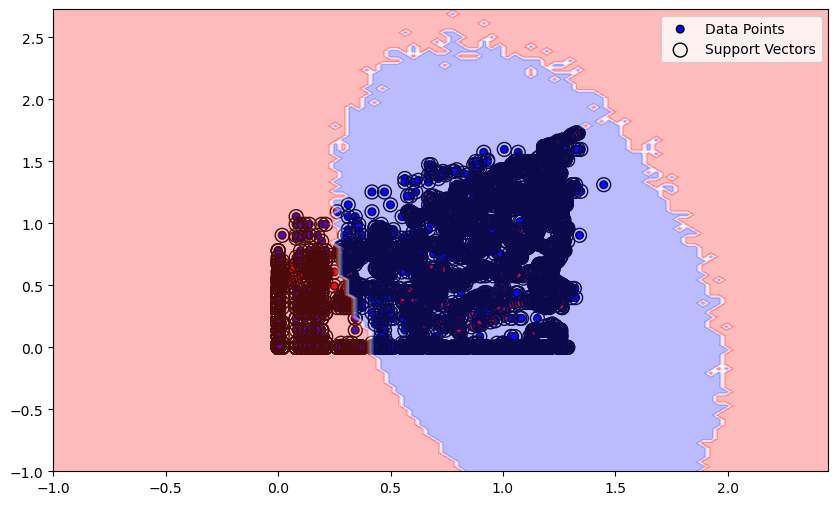

Results for Training Set:
Accuracy: 0.12
Precision: 0.05
Recall: 0.05
F1 Score: 0.05
Confusion Matrix:
[[ 696 2907]
 [3437  166]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.17      0.19      0.18      3603
           1       0.05      0.05      0.05      3603

    accuracy                           0.12      7206
   macro avg       0.11      0.12      0.11      7206
weighted avg       0.11      0.12      0.11      7206

Results for Testing Set:
Accuracy: 0.17
Precision: 0.01
Recall: 0.05
F1 Score: 0.01
Confusion Matrix:
[[161 743]
 [ 89   5]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.18      0.28       904
           1       0.01      0.05      0.01        94

    accuracy                           0.17       998
   macro avg       0.33      0.12      0.15       998
weighted avg       0.58      0.17      0.25       998



In [70]:
dict_polynomial = {'kernel_type': 'polynomial', 'degree': 2, 'c': 1}
svm_polynomial = HardMarginSVM(dict_polynomial)


svm_polynomial.fit(X_train_resampled, y_train_resampled)
svm_polynomial.plot_decision_boundary(X_train_resampled, y_train_resampled)

y_train_pred = svm_polynomial.predict(X_train_resampled)
evaluate_model(y_train_resampled, y_train_pred, dataset_name="Training Set")

y_test_pred = svm_polynomial.predict(X_test_scaled_log)
evaluate_model(y_test, y_test_pred, dataset_name="Testing Set")

## VS Degreee 3


     pcost       dcost       gap    pres   dres
 0: -2.5385e+03 -7.6150e+03  3e+04  9e+01  3e+00
 1: -9.1135e+03 -1.8159e+04  2e+04  6e+01  2e+00
 2: -2.1449e+04 -3.4074e+04  2e+04  5e+01  2e+00
 3: -7.0644e+04 -8.9608e+04  2e+04  4e+01  1e+00
 4: -2.3106e+05 -2.6318e+05  3e+04  4e+01  1e+00
 5: -7.9746e+05 -8.7496e+05  8e+04  3e+01  1e+00
 6: -4.6001e+06 -4.8574e+06  3e+05  3e+01  1e+00
 7: -2.6871e+07 -2.7987e+07  1e+06  3e+01  1e+00
 8: -3.6148e+08 -3.6903e+08  8e+06  3e+01  1e+00
 9: -3.6842e+08 -3.7611e+08  8e+06  3e+01  1e+00
10: -1.5983e+10 -1.6027e+10  4e+07  3e+01  1e+00
11: -1.6832e+10 -1.6878e+10  5e+07  3e+01  1e+00
12: -2.9844e+10 -2.9927e+10  8e+07  3e+01  1e+00
13: -7.0779e+10 -7.0975e+10  2e+08  3e+01  1e+00
14: -7.0885e+10 -7.1081e+10  2e+08  3e+01  1e+00
15: -1.3922e+11 -1.3960e+11  4e+08  3e+01  1e+00
16: -2.9886e+11 -2.9968e+11  8e+08  3e+01  1e+00
17: -3.8737e+11 -3.8842e+11  1e+09  3e+01  1e+00
18: -4.3130e+11 -4.3246e+11  1e+09  3e+01  1e+00
Terminated (singular 

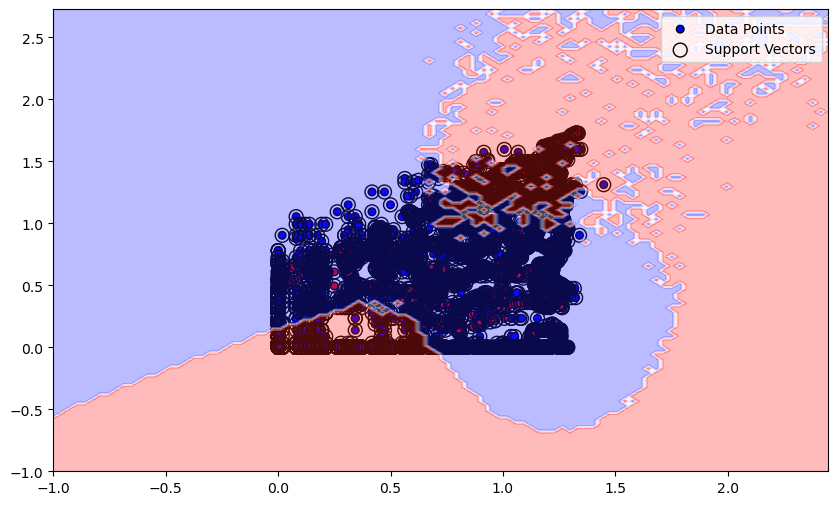

Results for Training Set:
Accuracy: 0.26
Precision: 0.27
Recall: 0.28
F1 Score: 0.28
Confusion Matrix:
[[ 858 2745]
 [2584 1019]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.25      0.24      0.24      3603
           1       0.27      0.28      0.28      3603

    accuracy                           0.26      7206
   macro avg       0.26      0.26      0.26      7206
weighted avg       0.26      0.26      0.26      7206

Results for Testing Set:
Accuracy: 0.25
Precision: 0.05
Recall: 0.41
F1 Score: 0.09
Confusion Matrix:
[[210 694]
 [ 55  39]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.79      0.23      0.36       904
           1       0.05      0.41      0.09        94

    accuracy                           0.25       998
   macro avg       0.42      0.32      0.23       998
weighted avg       0.72      0.25      0.33       998



In [71]:
dict_polynomial = {'kernel_type': 'polynomial', 'degree': 3, 'c': 1}
svm_polynomial = HardMarginSVM(dict_polynomial)


svm_polynomial.fit(X_train_resampled, y_train_resampled)
svm_polynomial.plot_decision_boundary(X_train_resampled, y_train_resampled)

y_train_pred = svm_polynomial.predict(X_train_resampled)
evaluate_model(y_train_resampled, y_train_pred, dataset_name="Training Set")

y_test_pred = svm_polynomial.predict(X_test_scaled_log)
evaluate_model(y_test, y_test_pred, dataset_name="Testing Set")


## Soft Margin SVM

In [72]:
def find_alpha_soft(X, y, K, C):

    n_samples, n_features = X.shape
    P_numpy, q_numpy, G_numpy, h_numpy, A_numpy, b_numpy = None, None, None, None, None, None

    # Convert inputs to cvxopt format
    ######### YOUR CODE HERE #########

    y = y.reshape(-1,1) #shape it as a vector of (n_samples,1)

    yyt = y @ y.T #compute yi*yj

    P_numpy = yyt * K #matrix multiplication between each line and each column for y, them multiplied by matrix K
    q_numpy = -np.ones(n_samples)
    G_numpy = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h_numpy = np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)) #not convinced about this
    A_numpy = y.reshape(1,-1)
    b_numpy = np.zeros(1)

    ##################################

    # Convert inputs to cvxopt format
    P = matrix(P_numpy, tc='d')
    q = matrix(q_numpy, tc='d')
    G = matrix(G_numpy, tc='d')
    h = matrix(h_numpy, tc='d')
    A = matrix(A_numpy, tc='d')
    b = matrix(b_numpy, tc='d')

    # Solve the QP problem to find Lagrange multipliers alpha
    solution = solvers.qp(P, q, G, h, A, b)
    alpha = np.ravel(solution['x'])

    return alpha

In [73]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

class SoftMarginSVM:
    def __init__(self, kwargs=None):
        self.kwargs = kwargs
        self.C = kwargs['C']
        self.alpha = None
        self.support_vectors = None
        self.w = None
        self.b = None

    def kernel_function(self, x, y):
        return compute_kernel_matrix(x, y, self.kwargs)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute the Kernel matrix
        K = self.kernel_function(X, X)

        self.alpha = find_alpha_soft(X, y, K, self.C)

        # Select support vectors
        support_vector_indices = (self.alpha > 1e-8) & (self.alpha < self.kwargs.get('C', np.inf))
        self.alpha = self.alpha[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]

        # Compute the bias term b
        ######### YOUR CODE HERE #########

        decision_function_at_support = np.sum(
            self.alpha * self.support_vector_labels *
            self.kernel_function(self.support_vectors, self.support_vectors), axis=1
        )
        self.b = np.mean(self.support_vector_labels - decision_function_at_support)

        ##################################

    def predict(self, X):

        pred = None

        ######### YOUR CODE HERE #########

        K_matr = self.kernel_function(X, self.support_vectors)

        decision_function = K_matr @ (self.alpha * self.support_vector_labels) + self.b

        pred = np.sign(decision_function)

        ##################################

        return pred

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', s=30, edgecolors='k', label='Data Points')
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, linewidth=1, facecolors='none',
                    edgecolors='k', label='Support Vectors')

        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.legend()
        plt.show()


     pcost       dcost       gap    pres   dres
 0: -2.3580e+03 -1.6383e+04  8e+04  3e+00  1e-12
 1: -1.5169e+03 -9.5466e+03  1e+04  1e-01  1e-12
 2: -1.5158e+03 -2.9441e+03  2e+03  2e-02  7e-13
 3: -1.5679e+03 -2.4555e+03  1e+03  1e-02  7e-13
 4: -1.6195e+03 -1.9699e+03  4e+02  3e-03  9e-13
 5: -1.6355e+03 -1.8826e+03  3e+02  2e-03  9e-13
 6: -1.6453e+03 -1.8297e+03  2e+02  9e-04  1e-12
 7: -1.6589e+03 -1.7775e+03  1e+02  5e-04  1e-12
 8: -1.6631e+03 -1.7628e+03  1e+02  4e-04  9e-13
 9: -1.6713e+03 -1.7374e+03  7e+01  2e-04  1e-12
10: -1.6777e+03 -1.7192e+03  4e+01  8e-05  1e-12
11: -1.6831e+03 -1.7073e+03  2e+01  4e-05  1e-12
12: -1.6861e+03 -1.7008e+03  1e+01  1e-05  1e-12
13: -1.6882e+03 -1.6974e+03  9e+00  7e-06  1e-12
14: -1.6892e+03 -1.6958e+03  7e+00  4e-06  1e-12
15: -1.6902e+03 -1.6942e+03  4e+00  2e-06  1e-12
16: -1.6910e+03 -1.6931e+03  2e+00  1e-06  1e-12
17: -1.6914e+03 -1.6925e+03  1e+00  4e-07  1e-12
18: -1.6917e+03 -1.6922e+03  5e-01  1e-07  1e-12
19: -1.6918e+03 -1.69

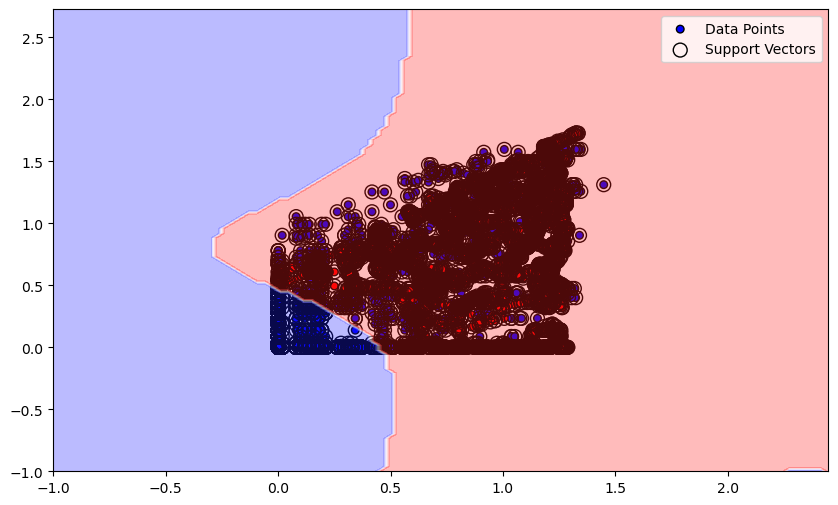

Gaussian SVM results on testing set:


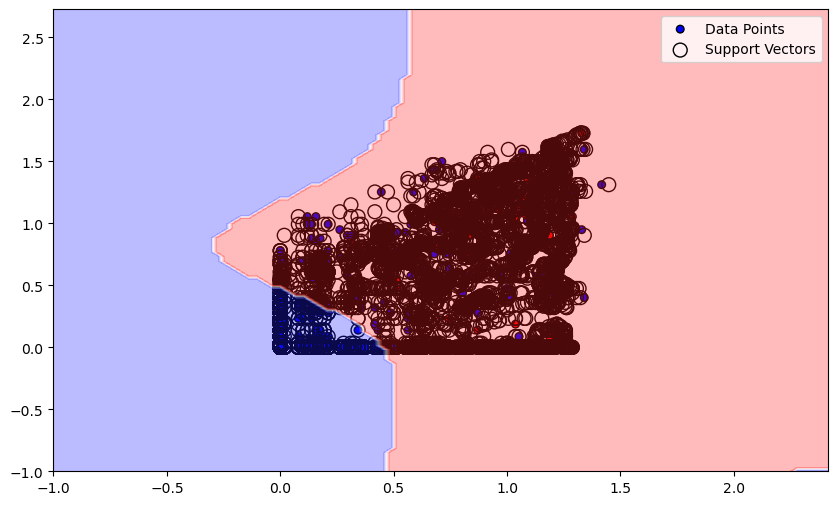

Results for Training Set:
Accuracy: 0.88
Precision: 0.81
Recall: 1.00
F1 Score: 0.90
Confusion Matrix:
[[2762  841]
 [   0 3603]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.77      0.87      3603
           1       0.81      1.00      0.90      3603

    accuracy                           0.88      7206
   macro avg       0.91      0.88      0.88      7206
weighted avg       0.91      0.88      0.88      7206

Results for Testing Set:
Accuracy: 0.80
Precision: 0.32
Recall: 1.00
F1 Score: 0.48
Confusion Matrix:
[[700 204]
 [  0  94]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.77      0.87       904
           1       0.32      1.00      0.48        94

    accuracy                           0.80       998
   macro avg       0.66      0.89      0.68       998
weighted avg       0.94      0.80      0.84       998



In [74]:
dict_gaussian = {'kernel_type': 'gaussian', 'gamma': 1, 'C': 1}
svm_gaussian = SoftMarginSVM(dict_gaussian)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_log = np.log1p(np.maximum(X_train_scaled, 0))
X_test_scaled_log = np.log1p(np.maximum(X_test_scaled, 0))

X_train_scaled_log = handle_nan(X_train_scaled_log)
X_test_scaled_log = handle_nan(X_test_scaled_log)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_log, y_train)

svm_gaussian.fit(X_train_resampled, y_train_resampled)

print("Gaussian SVM results on training set:")
svm_gaussian.plot_decision_boundary(X_train_resampled, y_train_resampled)

print("Gaussian SVM results on testing set:")
svm_gaussian.plot_decision_boundary(X_test_scaled_log, y_test)

y_train_pred = svm_gaussian.predict(X_train_resampled)
evaluate_model(y_train_resampled, y_train_pred, dataset_name="Training Set")

y_test_pred = svm_gaussian.predict(X_test_scaled_log)
evaluate_model(y_test, y_test_pred, dataset_name="Testing Set")
